mnistの導入はここで行う。諸ファイルの仕様は教科書とそのgithubを参考にしている。

Label: 5


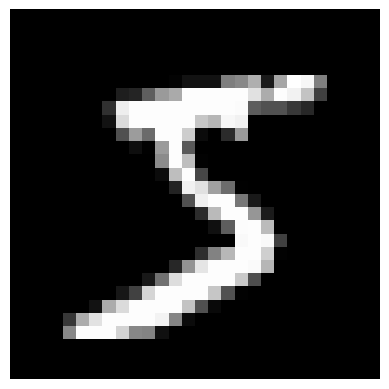

In [14]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
import matplotlib.pyplot as plt

def img_show(img): ###
        pil_img = Image.fromarray(np.uint8(img))
    
    # notebook上で表示するためにmatplotlibを使用
        plt.imshow(np.array(pil_img), cmap='gray')
        plt.axis('off') # 軸を非表示にする
        plt.show()

# データ読み込み（ここは既存の通り）
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(f"Label: {label}")

# 形状を元の画像サイズに変形
img = img.reshape(28, 28)

# notebook内に画像が表示される
img_show(img)

以下のプログラムではget_dataでmnistからデータを取得し
適当な重みづけをmnist.pklで行ったのち順伝播を行っているものである。

Accuracyは0~9の値の正答率である。(まだこれを決める方法を知らないことに注意)また、バッチ処理を行っていることに注意する。

In [15]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
